# Задача:


Имея данные о продаже жилых домов в Эймсе, штат Айова необходимо создать модель предсказания конечной цены дома. 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from boruta import BorutaPy as bp

from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from lightgbm import LGBMRegressor



from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error

# from google.colab import drive 
# drive.mount('/content/gdrive')



## Подготовка данных

Посмотрим на данные

In [2]:
# display(pd.read_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/train.csv'))
# display(pd.read_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/train.csv').info())
display(pd.read_csv('train.csv'))
display(pd.read_csv('train.csv').info())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

In [3]:
# display(pd.read_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/test.csv'))
# display(pd.read_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/test.csv').info())
display(pd.read_csv('test.csv'))
display(pd.read_csv('test.csv').info())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

Поскольку у нас есть пропуски и в тренировочном и в тестовом датасетах - объединим их, обработаем пропуски, а затем разъединим обратно. Главное, чтобы в тренировочных данных в зависимой переменной небыло пропусков

In [4]:
# train = pd.read_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/train.csv')
train = pd.read_csv('train.csv')
train['train'] = 1
# test = pd.read_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/test.csv')
test = pd.read_csv('test.csv')
test['train'] = 0

all = pd.concat([train,test], axis=0)

Посмотрим, какие из этих данных содержат пропуски.

In [5]:

display(all.columns[all.isna().any()])


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

Отлично, теперь нам надо понять, что стоит за этими колонками и могут ли там быть пропуски. Для этого обратимся к справке:

|Переменная|Определение|Возможные значения|
|:-------|:--------|:----------|
|MSubClass| Определяет тип жилья, участвующего в продаже|  <ul><li>20</li><li>30</li><li>40</li><li>45</li><li>50</li><li>60</li><li>70</li><li>75</li><li>80</li><li>85</li><li>90</li><li>120</li><li>150</li><li>160</li><li>180</li><li>190</li></ul>|
|MSZoning|Определяет общую классификацию зонирования продажи|<ul><li>A</li><li>C</li><li>FV</li><li>I</li><li> RH</li><li>RL</li><li>RP</li><li> RM</li></ul>|
|LotFrontage|Линейные футы улицы, соединенной с недвижимостью|число|
|LotArea|Размер участка в квадратных футах|число|
|Street|Тип подъездной дороги к собственности|<ul><li>Grvl</li><li>Pave</li></ul>|
|Alley|Тип доступа к собственности по аллее|<ul><li>Grvl</li><li>Pave</li><li>NA</li></ul>|
|LotShape|Общая форма собственности|<ul><li>Reg</li><li>IR1</li><li>IR2</li><li>IR3</li></ul>|
|LandContour|Ровность участка|<ul><li>Lvl</li><li>Bnk Banked</li><li>HLS</li><li>Low</li></ul>|
|Utilities|Тип доступных коммунальных услуг|<ul><li>AllPub</li><li>NoSewr</li><li>NoSeWa</li><li>ELO</li></ul>|
|LotConfig|Конфигурация лота|<ul><li>Inside</li><li>Corner</li><li>CulDSac</li><li>FR2</li><li>FR3</li></ul>|
|LandSlope|Уклон участка|<ul><li>Gtl</li><li>Mod</li><li>Sev</li></ul>|
|Neighborhood|Физические местоположения в пределах города Эймс|<ul><li>Blmngtn</li><li>Blueste</li><li>BrDale</li><li>BrkSide</li><li>ClearCr</li><li>CollgCr</li><li>Crawfor</li><li>Edwards</li><li>Gilbert</li><li>IDOTRR</li><li>MeadowV</li><li>Mitchel</li><li>Names</li><li>NoRidge</li><li>NPkVill</li><li>NridgHt</li><li>NWAmes</li><li>OldTown</li><li>SWISU</li><li>Sawyer</li><li>SawyerW</li><li>Somerst</li><li>StoneBr</li><li>Timber</li><li>Veenker</li></ul>|
|Condition1|Близость к различным условиям|<ul><li>Artery</li><li>Feedr</li><li>Norm</li><li>RRNn</li><li>RRAn</li><li>PosN</li><li>PosA</li><li>RRNe</li><li>RRAe</li></ul>|
|Condition2|Близость к различным условиям (если присутствует более одного)|<ul><li>Artery</li><li>Feedr</li><li>Norm</li><li>RRNn</li><li>RRAn</li><li>PosN</li><li>PosA</li><li>RRNe</li><li>RRAe</li></ul>|
|BldgType|Тип жилого помещения|<ul><li>1Fam</li><li>2FmCon</li><li>Duplx</li><li>TwnhsE</li><li>TwnhsI</li></ul>|
|HouseStyle|Стиль жилища|<ul><li>1Story</li><li>1.5Fin</li><li>1.5Unf</li><li>2Story</li><li>2.5Fin</li><li>2.5Unf</li><li>SFoyer</li><li>SLvl</li></ul>|
|OverallQual|Оценивает общий материал и отделку дома|<ul><li>1</li><li>2</li><li>3</li><li>4</li><li>5</li><li>6</li><li>7</li><li>8</li><li>9</li><li>10</li></ul>|
|OverallCond|Оценивает общее состояние дома|<ul><li>1</li><li>2</li><li>3</li><li>4</li><li>5</li><li>6</li><li>7</li><li>8</li><li>9</li><li>10</li></ul>|
|YearBuilt|Первоначальная дата постройки|число|
|YearRemodAdd|Дата реконструкции (совпадает с датой строительства, если нет реконструкции или дополнений)|число|
|RoofStyle|Тип крыши|<ul><li>Flat</li><li>Gable</li><li>Gambrel</li><li>Hip</li><li>Mansard</li><li>Shed</li></ul>|
|RoofMatl|Кровельный материал|<ul><li>ClyTile</li><li>CompShg</li><li>Membran</li><li>Metal</li><li>Roll</li><li>Tar&Grv</li><li>WdShake</li><li>WdShngl</li></ul>|
|Exterior1st|Наружное покрытие дома|<ul><li>AsbShng</li><li>AsphShn</li><li>BrkComm</li><li>BrkFace</li><li>CBlock</li><li>CemntBd</li><li>HdBoard</li><li>ImStucc</li><li>MetalSd</li><li>Other</li><li>Plywood</li><li>PreCast</li><li>Stone</li><li>Stucco</li><li>VinylSd</li><li>WdSdng</li><li>WdShing</li></ul>|
|Exterior2nd|Наружное покрытие дома (если более одного материала)|<ul><li>AsbShng</li><li>AsphShn</li><li>BrkComm</li><li>BrkFace</li><li>CBlock</li><li>CemntBd</li><li>HdBoard</li><li>ImStucc</li><li>MetalSd</li><li>Other</li><li>Plywood</li><li>PreCast</li><li>Stone</li><li>Stucco</li><li>VinylSd</li><li>WdSdng</li><li>WdShing</li></ul>|
|MasVnrType|Тип облицовки каменной кладки|<ul><li>BrkCmn</li><li>BrkFace</li><li>CBlock</li><li>None</li><li>Stone</li></ul>|
|MasVnrArea|Площадь облицовки каменной кладки в квадратных футах|число|
|ExterQual|Оценивает качество материала на внешней стороне|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>Po</li></ul>|
|ExterCond|Оценивает текущее состояние материала на внешней стороне|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>Po</li></ul>|
|Foundation|Тип фундамента|<ul><li>BrkTil</li><li>CBlock</li><li>PConc</li><li>Slab</li><li>Stone</li><li>Wood</li></ul>|
|BsmtQual|Оценивает высоту подвала|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>Po</li><li>NA</li></ul>|
|BsmtCond|Оценивает общее состояние подвала|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>Po</li><li>NA</li></ul>|
|BsmtExposure|Относится к стенам на уровне прохода или сада|<ul><li>Gd</li><li>Av</li><li>Mn</li><li>No</li><li>NA</li></ul>|
|BsmtFinType1|Оценка готовой площади подвала|<ul><li>GLQ</li><li>ALQ</li><li>BLQ</li><li>Rec</li><li>LwQ</li><li>Unf</li><li>NA</li></ul>|
|BsmtFinSF1|Готовые квадратные футы типа 1|число|
|BsmtFinType2|Рейтинг готовой площади подвала (если несколько типов)|<ul><li>GLQ</li><li>ALQ</li><li>BLQ</li><li>Rec</li><li>LwQ</li><li>Unf</li><li>NA</li></ul>|
|BsmtFinSF2|Готовые квадратные футы типа 2|число|
|BsmtUnfSF|Незаконченные квадратные футы подвальной площади|число|
|TotalBsmtSF|Общая площадь подвала в квадратных футах|число|
|Heating|Тип отопления|<ul><li>Floor</li><li>GasA</li><li>GasW</li><li>Grav</li><li>OthW</li><li>Wall</li></ul>|
|HeatingQC|Качество и состояние отопления|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>FA</li><li>Po</li></ul>|
|CentralAir|Центральное кондиционирование воздуха|<ul><li>N</li><li>Y</li></ul>|
|Electrical|Электрическая система|<ul><li>SBrkr</li><li>FuseA</li><li>FuseF</li><li>FuseP</li><li>Mix</li></ul>|
|1stFlrSF|Площадь первого этажа в квадратных футах|число|
|2ndFlrSF|Площадь второго этажа в квадратных футах|число|
|LowQualFinSF|Низкое качество готовых квадратных футов (все этажи)|число|
|GrLivArea|надземная (наземная) жилая площадь в квадратных футах|число|
|BsmtFullBath|Подвал с ванными комнатами|число|
|BsmtHalfBath|Половина ванных комнат на цокольном этаже|число|
|FullBath|Полные ванные комнаты |число|
|HalfBath|Половинные ванны |число|
|Bedroom|Спальни(не включает спальни на цокольном этаже)|число|
|Kitchen|Кухни высшего класса|число|
|KitchenQual|Качество кухни|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>Po</li></ul>|
|TotRmsAbvGrd|Общее количество комнат выше класса (не включает ванные комнаты)|число|
|Functional|Домашняя функциональность (предполагайте типичную, если только вычеты не оправданы)|<ul><li>Typ</li><li>Min1</li><li>Min2</li><li>Mod</li><li>Maj1</li><li>Maj2</li><li>Sev</li><li>Sal</li></ul>|
|Fireplaces|Количество каминов|число|
|FireplaceQu|Качество камина|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>Po</li><li>NA</li></ul>|
|GarageType|Расположение гаража|<ul><li>2Types</li><li>Attchd</li><li>Basment</li><li>BuiltIn</li><li>CarPort</li><li>Detchd</li><li>NA</li></ul>|
|GarageYrBlt| Год постройки гаража|число|
|GarageFinish| Внутренняя отделка гаража|<ul><li>Fin</li><li>RFn</li><li>Unf</li><li>NA</li></ul>|
|GarageCars| Размер гаража в вместимости автомобиля|число|
|GarageArea| Размер гаража в квадратных футах|число|
|GarageQual| Качество гаража|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>Po</li><li>NA</li></ul>|
|GarageCond| Состояние гаража|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>Po</li><li>NA</li></ul>|
|PavedDrive| Асфальтированная подъездная дорога|<ul><li>Y</li><li>P</li><li>N</li></ul>|
|WoodDeckSF| Площадь деревянной палубы в квадратных футах|число|
|OpenPorchSF|Площадь открытой веранды в квадратных футах|число|
|EnclosedPorch|Площадь закрытой веранды в квадратных футах|число|
|3SsnPorch|Площадь крыльца на три сезона в квадратных футах|число|
|ScreenPorch|Площадь крыльца с экраном в квадратных футах|число|
|PoolArea|Площадь бассейна в квадратных футах|число|
|PoolQC|Качество бассейна|<ul><li>Ex</li><li>Gd</li><li>TA</li><li>Fa</li><li>NA</li></ul>|
|Fence|Качество забора|<ul><li>GdPv</li><li>MnPrv</li><li>GdWo</li><li>MnWw</li><li>NA</li></ul>|
|MiscFeature|Разные функции, не включенные в другие категории|<ul><li>Elev</li><li>Gar2</li><li>Othr</li><li>Shed</li><li>TenC</li><li>NA</li></ul>|
|MiscVal|Стоимость разных функций|число|
|MoSold|Месяц продажи |число|
|YrSold|Год продажи |число|
|SaleType|Тип продажи |<ul><li>WD</li><li>CWD</li><li>VWD</li><li>New</li><li>COD</li><li>Con</li><li>ConLw</li><li>ConLI</li><li>Cold</li><li>Oth</li></ul>|
|SaleCondition|Условия продажи |<ul><li>Normal</li><li>Abnormal</li><li>Adj Land</li><li>Alloca</li><li>Family</li><li>Partial</li></ul>|

А теперь, когда мы знаем, что есть что - посмотрим более пристально. Для начала посмотрим, все ли числовые значения имеют тип "число".

In [6]:
all[[
    'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']].dtypes

LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

Отлично. Все числа - числа, даже те, которые могли бы быть датой. Как нам и надо. Теперь можно заняться обработкой пропусков.

In [7]:
display(all.columns[all.isna().any()])

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

Чтобы не обрабатывать все подряд - посмотрим, вдруг в некоторых колонках процент пропусков необычайно высок. В этом случае можно просто избавиться от таких колонок.

In [8]:
NAN = [(c, all[c].isna().mean()*100) for c in all]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

NAN = NAN[NAN.percentage>0]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
80,SalePrice,49.982871
57,FireplaceQu,48.646797
3,LotFrontage,16.649538
64,GarageCond,5.447071
59,GarageYrBlt,5.447071
60,GarageFinish,5.447071


Какие-то колонки мы можем удалить (например те, в которых большой процент пропуска), но мы все же потеряем так часть информации, поэтому лучше обработаем пропуски в каждом отдельном случае и уже затем решим, какие признаки значимы, а какие нет.


Поскольку в некоторых столбцах у нас допускается наличие значений N/A, то заменим в них N/A на None. 

In [9]:
all.PoolQC.fillna('None', inplace=True)
all.MiscFeature.fillna('None', inplace = True)
all.Alley.fillna('None', inplace = True)
all.Fence.fillna('None', inplace = True)
all.FireplaceQu.fillna('None', inplace = True)
all.GarageType.fillna('None', inplace = True)
all.GarageFinish.fillna('None', inplace = True)
all.GarageQual.fillna('None', inplace = True)
all.GarageCond.fillna('None', inplace = True)
all.BsmtQual.fillna('None', inplace = True)
all.BsmtCond.fillna('None', inplace = True)
all.BsmtExposure.fillna('None', inplace = True)
all.BsmtFinType1.fillna('None', inplace = True)
all.BsmtFinType2.fillna('None', inplace = True)

# будем считать что N/A возникает, когда нет облицовки
all.MasVnrType.fillna('None', inplace = True) 

Теперь разберемся с теми значениями числовых переменных, которые мы можем заполнить без доп.исследования. 

Например, можем предположить, что площадь улицы принадлежащей дому примерно одинакова для всех соседних домов.

In [10]:
all.LotFrontage = all.groupby("Neighborhood").LotFrontage.transform(lambda x: x.fillna(x.median()))

Разберемся с подвалом: 
- если он есть (BsmtQual != 'None') то у него есть готовые квадратные футы (BsmtFinSF1 или BsmtFinSF2) и/или незаконченые квадратные футы (BsmtUnfSF). Могут быть или не быть ванные комнаты (BsmtFullBath и BsmtHalfBath)
- если его нет (BsmtQual == 'None'), то у него нет общей площади (TotalBsmtSF), готовых и неготовых кфадратных футов (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF), и нет ванных (BsmtFullBath и BsmtHalfBath)

Разберемся сначала со вторым случаем

In [11]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
  all.loc[all['BsmtQual'] == 'None', col] = 0

А теперь проверим, остались ли пропуски данных в этих столбцах.

In [12]:
all[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].isna().sum()


BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

Теперь посмотрим, действительно ли у всех записей, у которых нет гаража есть пропуски в полях года постройки гаража.

In [13]:
display(all[all['GarageType']=='None'].GarageYrBlt.isna().sum() == all[all['GarageType']=='None'].shape[0])

True

Значит, можно смело заменять год постройки гаража на ноль

In [14]:
all.GarageYrBlt.fillna(0, inplace = True)

А теперь посмотри у скольких записей у которых нет гаража - есть пропуски в площади гаража и количестве машино-мест

In [15]:
display(all[all['GarageType']=='None'].shape[0])
display(all[all['GarageType']=='None'].GarageArea.isna().sum())
display(all[all['GarageType']=='None'].GarageCars.isna().sum())

157

0

0

Отлично, значит незаполненные значения у нас для тех домов, где гараж есть. Заменим пропуски на медианное значение

In [16]:
all.GarageArea.fillna(all.GarageArea.median(), inplace=True)
all.GarageCars.fillna(all.GarageCars.median(), inplace=True)

Если нет облицовки, то нет и площади облицовки

In [17]:
all[all['MasVnrType']=='None'].MasVnrArea.isna().sum() == all.MasVnrArea.isna().sum()

True

Все правильно, заменяем

In [18]:
all.MasVnrArea.fillna(0, inplace=True)

Теперь посмотрим на категориальные признаки MSZoning, Utilities и Functional, Electrical в которых есть пропуски данных, но нет возможного значения N/A.

In [19]:
for col in ['MSZoning','Utilities','Functional','Electrical', 'KitchenQual', 'Exterior1st','Exterior2nd','SaleType']:
  display(all[col].value_counts())
  display(f'всего пропусков: {all[col].isna().sum()}')

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

'всего пропусков: 4'

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

'всего пропусков: 2'

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

'всего пропусков: 2'

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

'всего пропусков: 1'

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

'всего пропусков: 1'

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

'всего пропусков: 1'

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

'всего пропусков: 1'

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

'всего пропусков: 1'

Отлично, значит во всех, кроме Utilities заменяем пропуски на самое частое значение, а Utilities просто удалим, потому что там 2 пропущенных значения и 1 значение NoSeWa, а все остальные - AllPub

In [20]:
for col in ['MSZoning','Functional','Electrical', 'KitchenQual', 'Exterior1st','Exterior2nd','SaleType']:
  all[col].fillna(all[col].mode()[0], inplace=True)

all.drop(columns=['Utilities'], axis=1, inplace=True)


Проверим где остались необработанные пропуски

In [21]:
NAN = [(c, all[c].isna().mean()*100) for c in all]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

NAN = NAN[NAN.percentage>0]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
79,SalePrice,49.982871


Отлично. Значит все пропуски обработали. Пропуски в SalePrice вызваны тем, что мы объединяли тренировочный и тестовый датафреймы.

~~У нас есть 4 переменные которые выражены в годах: 'YearBuilt','YearRemodAdd','GarageYrBlt' и 'YrSold'. По отдельности эти года нам не о чем не говорят, например год постройки - не значит ничего, а вот возраст дома на момент продажи - это уже более значимый показатель. Поэтому заменим 'YearBuilt','YearRemodAdd','GarageYrBlt' на "возраст дома на момент продажи", "возраст реконструкции на момент продажи" и "возраст гаража на момент постройки".~~


In [22]:
# for col in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
#   print('Корреляция до изменения: ',all.query('train==1')[col].corr(all.query('train==1').SalePrice ))
#   all[col] = all.YrSold - all[col]
#   print('Корреляция после изменения: ', all.query('train==1')[col].corr(all.query('train==1').SalePrice ))

~~После такой замены хоть и не значительно, но изменилась сила связи 'YearBuilt','YearRemodAdd','GarageYrBlt', а также изменилось направление связи (оно и понятно, раньше было "чем новее - тем дороже", теперь "чем больше возраст - тем меньше цена").~~


Поскольку у нас много категорийных переменных и мы не знаем, как вносилислись ли они из предопределенного списка или же вносились руками, то нам нужно проверить, что количество уникальных значений каждого категориального столбца не больше чем возможное количество вариантов. Если в каком-то столбце это не так, то значит в этом сдолбце есть "описки" 

In [23]:
all.columns.to_list()


cats={
 #числа
    'MSSubClass':[20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190],
    'MSZoning':['A','C','FV','I','RH','RL','RP','RM'],
    'Street':['Grvl','Pave'],
    'Alley':['Grvl','Pave', 'None'],
    'LotShape':['Reg','IR1','IR2','IR3'],
    'LandContour':['Lvl','Bnk','HLS','Low'],
    'LotConfig':['Inside','Corner','CulDSac','FR2','FR3'],
    'LandSlope':['Gtl','Mod','Sev'],
    'Neighborhood':['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','Names','NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker'],
    'Condition1':['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],
    'Condition2':['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],
    'BldgType':['1Fam','2FmCon','Duplx','TwnhsE','TwnhsI'],
    'HouseStyle':['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl'],
# числа
    'OverallQual':[1,2,3,4,5,6,7,8,9,10], 
# числа
    'OverallCond':[1,2,3,4,5,6,7,8,9,10], 
    'RoofStyle':['Flat','Gable','Gambrel','Hip','Mansard','Shed'],
    'RoofMatl':['ClyTile','CompShg','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl'],
    'Exterior1st':['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'],
    'Exterior2nd':['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'],
    'MasVnrType':['BrkCmn','BrkFace','CBlock','None','Stone'],
    'ExterQual':['Ex','Gd','TA','Fa','Po'],
    'ExterCond':['Ex','Gd','TA','Fa','Po'],
    'Foundation':['BrkTil','CBlock','PConc','Slab','Stone','Wood'],
    'BsmtQual':['Ex','Gd','TA','Fa','Po','None'],
    'BsmtCond':['Ex','Gd','TA','Fa','Po','None'],
    'BsmtExposure':['Gd','Av','Mn','No','None'],
    'BsmtFinType1':['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'],
    'BsmtFinType2':['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'],
    'Heating':['Floor','GasA','GasW','Grav','OthW','Wall'],
    'HeatingQC':['Ex','Gd','TA','Fa','Po'],
    'CentralAir':['N','Y'],
    'Electrical':['SBrkr','FuseA','FuseF','FuseP','Mix'],
    'KitchenQual':['Ex','Gd','TA','Fa','Po'],
    'Functional':['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],
    'FireplaceQu':['Ex','Gd','TA','Fa','Po','None'],
    'GarageType':['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd','None'],
    'GarageFinish':['Fin','RFn','Unf','None'],
    'GarageQual':['Ex','Gd','TA','Fa','Po','None'],
    'GarageCond':['Ex','Gd','TA','Fa','Po','None'],
    'PavedDrive':['Y','P','N'],
    'PoolQC':['Ex','Gd','TA','Fa','None'],
    'Fence':['GdPrv','MnPrv','GdWo','MnWw','None'],
    'SaleType':['WD','CWD','VWD','New','COD','Con','ConLw','ConLI','ConLD','Oth'],
    'SaleCondition':['Normal','Abnorml','AdjLand','Alloca','Family','Partial']
}

for k,v in cats.items():

  uniques = all[k].unique()

  for i in uniques:
    if i not in cats[k]:
      print('_____________________')
      print(f'''
      В {k} не должно быть значения {i}. \n 
      Сиписок допустимых значений:{sorted(cats[k])} \n 
      Cписок существующих значений:{sorted(uniques)}\n
      Количество допустимых значений: {len(cats[k])}\n
      Количество фактических значений: {len(uniques)}
      ''')

_____________________

      В MSZoning не должно быть значения C (all). 
 
      Сиписок допустимых значений:['A', 'C', 'FV', 'I', 'RH', 'RL', 'RM', 'RP'] 
 
      Cписок существующих значений:['C (all)', 'FV', 'RH', 'RL', 'RM']

      Количество допустимых значений: 8

      Количество фактических значений: 5
      
_____________________

      В Neighborhood не должно быть значения NAmes. 
 
      Сиписок допустимых значений:['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NPkVill', 'NWAmes', 'Names', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'] 
 
      Cписок существующих значений:['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenke

После проверки мы видим, что, есть описки, но в целом, в целях прогнозирования они не критичны. В целях анализа "глазами" - критичны. Потому что, например в BldgType замена 'TwnhsE' (крайний блок в таунхаусе) на 'Twnhs' и замена 'TwnhsI' (внутренний блок в таунхаусе) на 'TwnhsE' означает, что если мы бы делали какие-то значимые для бизнеса выводы на основе анализа датафрейма, то мы бы могли легко перепутать в каком блоке таунхауса (внутреннем или внешнем) расположен объект продажи. 

Также мы увидели более значимую штуку - у нас есть 3 категориальные переменные, которые закодированы цифрами. Это не очень хорошо, явно зададим им тип строки.

In [24]:
all['MSSubClass'] = all['MSSubClass'].apply(str)
all['OverallQual'] = all['OverallQual'].apply(str)
all['OverallCond'] = all['OverallCond'].apply(str)

аналогично поступим с месяцем и годом продажи

In [ ]:
all['YrSold'] = all['YrSold'].astype(str)
all['MoSold'] = all['MoSold'].astype(str)

Cразу закодируем наши категориальные признаки c помощью чисел.
Для этого у нас в распоряжении есть минимум 2 метода: LableEncoding и OHE. Первый применяется когда данные упорядочены (например 0-начальная школа, 1-средняя школа, 2-среднее специальное образование и тд) и есть много категорий, а второй - когда данные не упорядочены (например 0-Японимя, 1-Россия, 2-Франция и тд) и данных не много. 
Поэтому, раз наши категориальные переменные могут быть упорядочены (GarageQual, GarageCond и тд) и не упорядочены(PavedDrive, MiscFeature и тд), то для разных независимых переменных будем использовать разный метод кодировки

***N.B.:*** в sklearn есть 2 функции, которыми можно сделать OHE: get_dummies() и OneHotEncoder(). Разница в них заключается в том, что из get_dummies() нам придется перекодировать обратно руками, в то время, как OneHotEncoder() запоминает, каким категориям какое число присвоено (это полезно, если мы обрабатываем тестовый и тренировочный датафреймы по отдельности), а также, в последних версиях sklearn, OneHotEncoder() может кодировать категориальные переменнные хранящиеся не только в виде строк, но и в виде чисел. Поскольку мы обрабатываем наши датафреймы вместе и у нас нет задачи обратной перекодировки признаков и все категориальные переменные выраженные числами мы уже перекодировали буквами - можем использовать get_dummies().

In [25]:


encod_dict = {
'OHE':['MSSubClass', 'MSZoning','Street','Alley','LotConfig', 'Neighborhood', 'Condition1', 'MiscFeature', 
       'Condition2', 'BldgType', 'LotShape','LandContour','LandSlope','HouseStyle', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'Foundation', 
       'Heating','CentralAir','GarageType', 'GarageFinish','PavedDrive', 'SaleType','SaleCondition'],

'LableEncoding':[ 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',  
                 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 
                 'GarageCond','PoolQC', 'Fence','YrSold','MoSold']

}


ohe_cols = all[encod_dict['OHE']].copy()
lable_cols = all[encod_dict['LableEncoding']].copy()
numeric_cols = all.drop(columns=all[encod_dict['OHE']+encod_dict['LableEncoding']].columns, axis=1).copy()

# OHE
new_all = pd.get_dummies(ohe_cols, drop_first=True).copy()

# LableEncoder
new_all[encod_dict['LableEncoding']] = lable_cols.apply(LabelEncoder().fit_transform).copy()

new_all[numeric_cols.columns] = numeric_cols.copy()

new_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 221 entries, MSSubClass_B to train
dtypes: float64(12), int64(42), uint8(167)
memory usage: 1.7 MB


In [26]:
# new_all= pd.get_dummies(all, drop_first=True).copy()


Теперь разделим нашу выборку обратно на тестовую и тренировочную и удалим зависимую переменную из тестовой выборки.

In [27]:
train = new_all.query('train==1').drop(columns=['train']).copy()

test = new_all.query('train == 0').drop(columns=['SalePrice','train']).copy()


И сразу удалим колонку Id из тренировочной выборки, потому что она не несет никакой информации.

In [28]:
display(train.shape)
train.drop(['Id'], axis=1, inplace=True)
display(train.shape)

(1460, 220)

(1460, 219)

In [29]:
train.drop_duplicates(inplace=True)
display(train.shape)

(1460, 219)

Отлично, данные почистили и привели в чувства. Теперь можно начинать их исследовать.

In [30]:
# pip install sweetviz

In [31]:
# import sweetviz as sv
# report = sv.analyze([all, " test"])
# report.show_html('common analysis.html')

## Анализ

Прежде всего посмотрим на распределение переменной, которую нам надо спрогнозировать.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

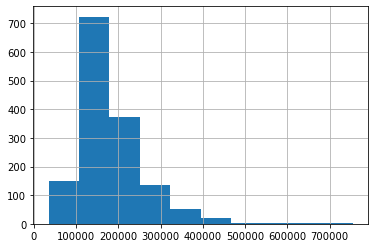

In [32]:
display(train.SalePrice.describe())
train.SalePrice.hist(backend=None)

In [33]:
# pip install scipy

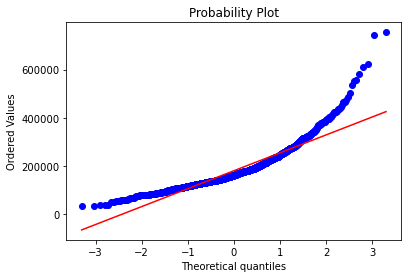

In [34]:
fig = plt.figure()
res = st.probplot(train.SalePrice, plot=plt)
plt.show()

Not bad. Распределение, конечно и скошено и правый хвост у него тяжелый, но понятно как его стандартизовать без особых усилий: взять логарифм

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<AxesSubplot:>

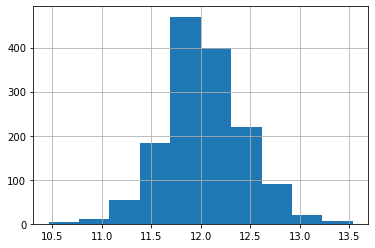

In [35]:
display(np.log(train.SalePrice).describe())
np.log(train.SalePrice).hist()

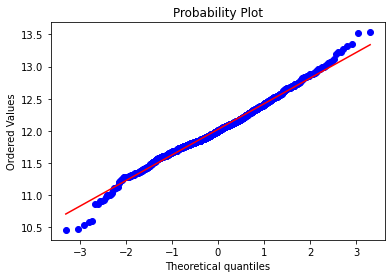

In [36]:
fig = plt.figure()
res = st.probplot(np.log(train.SalePrice), plot=plt)
plt.show()

Отлично. Запомним эту технику. Она нам пригодится.

А пока - перейдем к независимым переменным. Нужно понять, все ли они одинаково полезны.

Чтобы понять, какие факторы влияют на конечную цену жилья, а какие не очень - нужно провести анализ на важность признаков. Для этого нужно сначала понять, какие вообще у нас есть независимые переменные и какого они типа, ведь от этого зависит, какой метод выбрать. Наша зависимая переменная - непрерывна, тогда если:
- независимые переменные непрерывны - следует использовать wrapper или embeddid методы;
- незавимые переменные порядковые категории - следует использовать коэф.корреляции Спирмена;
- независимые переменные номинативны и порядковые категории - следует использовать ANOVA

Проблема в том, что в наших данных:
- есть номинативные переменные (например OverallQual, OverallCond, Condition1, Condition2)
- есть непрерывные переменные (например LotFrontage, LotArea)
- есть порядковые переменные где категории  (например ExtraQual, ExtraCond)
- есть булевые переменные (например CentralAir, хотя можно рассматривать ее как частный случай номинативной переменной)

Поскольку у нас полный набр - можно, в теории, разбить на группы и в каждой из них искать значимые переменные своими методами, а можно воспользоваться гением человеческой мысли и использовать алгоритм BORUTA. Так мы и поступим.

Определим значимые, с точки зрения алгоритма BORUTA факторы влияющие на цену продажи.


In [37]:

target_train = np.log(train.SalePrice)
features_train = train.drop(columns = 'SalePrice')

features_test = test



А вот теперь можно и BORUTA запустить

In [38]:
# !pip install boruta

In [39]:
rf_model = RandomForestRegressor(n_jobs= 4,oob_score= True)
feat_selector = bp(rf_model,n_estimators = 'auto', verbose= 0,max_iter= 100)
feat_selector.fit(features_train.values, target_train.values)
selected_features = [features_train.columns[i] for i, x in enumerate(feat_selector.support_) if x]
print(selected_features)

['CentralAir_Y', 'OverallQual', 'OverallCond', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']


Отлично, мы определили значимые независимые переменны. Соберем их

In [40]:
X_Train = features_train[selected_features]
X_Test = features_test[selected_features]

Супер! Есть:
- зависимая переменная, распределение которой мы нормализовали
- список значимых независимых переменных

Чего не хватает? Правильно, не хватает масштабирования независимых данных. 

Переменные, которые измеряются в разных масштабах - не вносят одинакового вклада в функцию подгонки модели и в конечном итоге могут привести к Баесу внутри модели.

Для того, чтобы привести независимые переменные к единому масштабу мы можем воспользоваться:
- стандартизацией и получить масштаб от 0 до 1, а в догунку изменение функции распределения на нормальную. Этот метод не устойчив к наличию выбросов в исходных данных.
- мини-макс преобразованием, которое даст нам изменение масштаба, не изменит функцию распределения, но будет также неустойчив к выбросам в исходных данных.
- метод надежного масштабирования, который изменит масштаб, изменит функцию рапределения и будет устойчив к выбросам.

Выбор, кажется, очевиден. Если нет выбросов, то попробуем использовать стандартизацию. А если выбросы есть - метод надежного масштабирования. Выбросы мы будем смотреть только по тем переменнм, которые изначально были непрерывные.

/var/folders/kf/x88_x0154fj0n72xz99wzmmm0000gn/T/ipykernel_56662/4267319767.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for i, feature in enumerate(X_Train[set(X_Train.columns)&set(numeric_cols.columns)]):


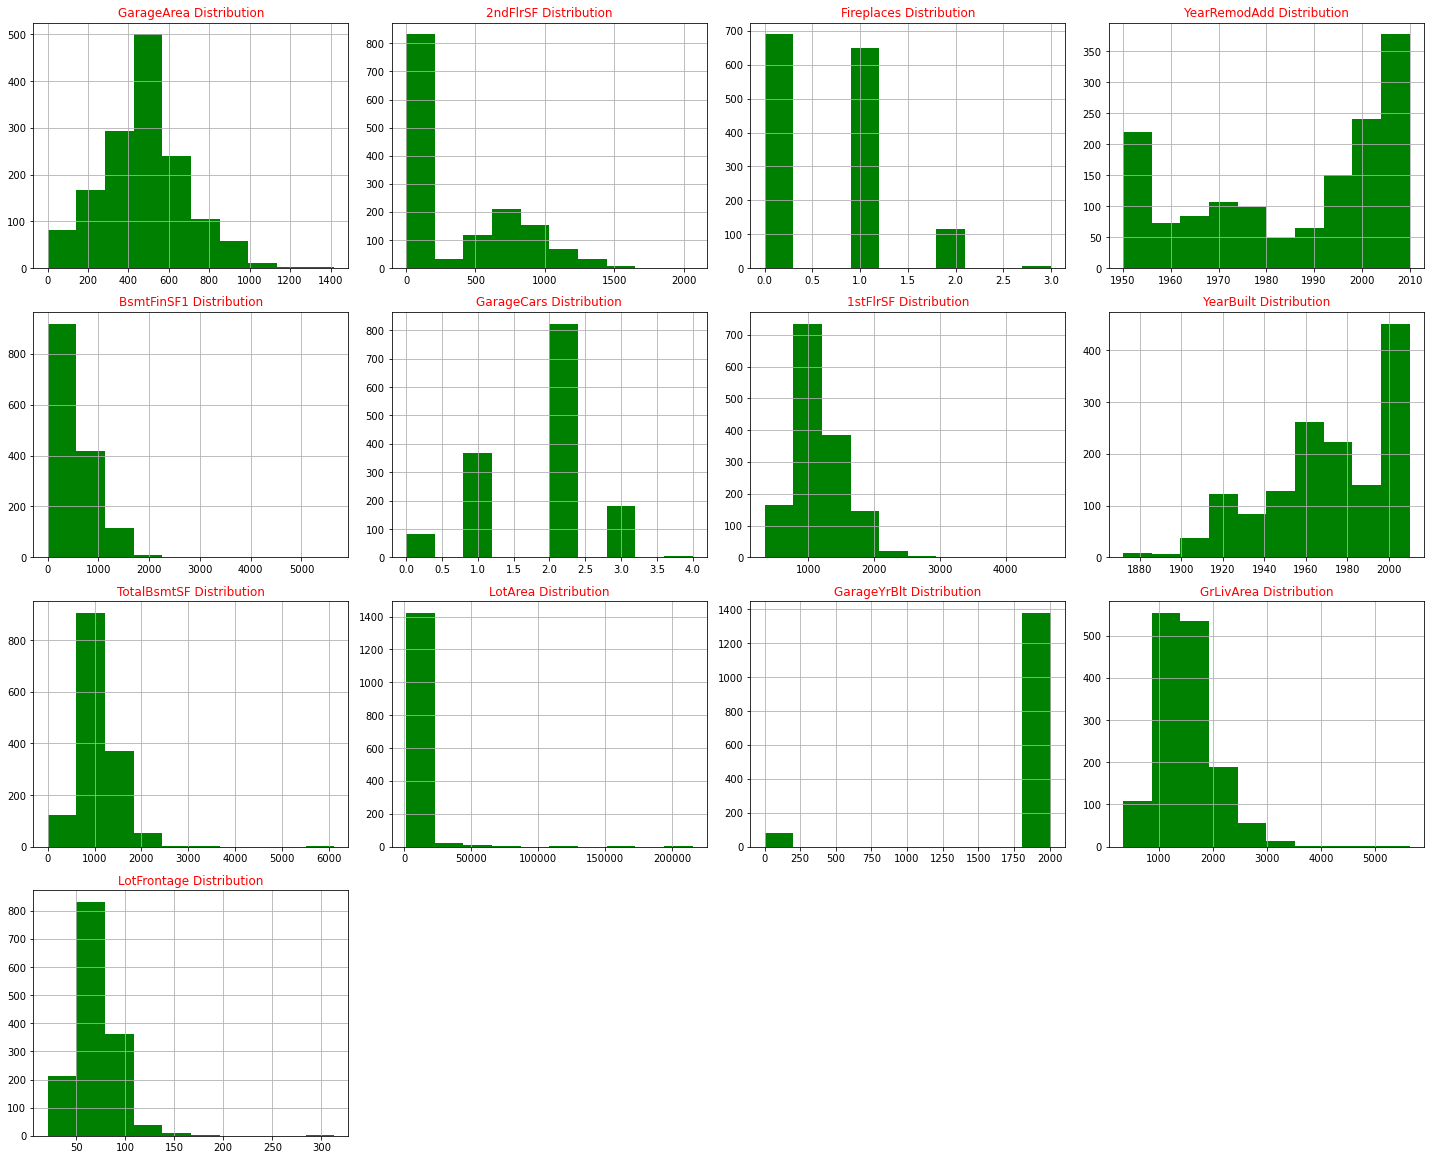

In [41]:
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(X_Train[set(X_Train.columns)&set(numeric_cols.columns)]):
    ax=fig.add_subplot(5,4,i+1)
    X_Train[feature].hist(ax=ax,facecolor='green')
    ax.set_title(feature+" Distribution",color='red')

fig.tight_layout()  
plt.show()

Очевидно, что есть выбросы. Значит используем метод надежного масштабирования, но только для тех переменных, которые непрерывные

In [42]:


# поскольку в X_Train есть не все колонки, которые есть в тренировочном датафрейме - возьмем из него только те, что есть в списке numeric_cols
# возможно каких-то колонок из numeric_cols нет в X_Train, поэтому нужно еще определить какие из numeric_cols есть в X_Train

transformer_robust = RobustScaler().fit(X_Train[set(X_Train.columns)&set(numeric_cols.columns)])

X_Train_scaler = X_Train.copy()
X_Test_scaler = X_Test.copy()



X_Train_scaler[X_Train[set(X_Train.columns)&set(numeric_cols.columns)].columns] = transformer_robust.transform(X_Train_scaler[X_Train[set(X_Train.columns)&set(numeric_cols.columns)].columns])
X_Test_scaler[X_Train[set(X_Train.columns)&set(numeric_cols.columns)].columns] = transformer_robust.transform(X_Test_scaler[X_Train[set(X_Train.columns)&set(numeric_cols.columns)].columns])



/var/folders/kf/x88_x0154fj0n72xz99wzmmm0000gn/T/ipykernel_56662/3597634580.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  transformer_robust = RobustScaler().fit(X_Train[set(X_Train.columns)&set(numeric_cols.columns)])
/var/folders/kf/x88_x0154fj0n72xz99wzmmm0000gn/T/ipykernel_56662/3597634580.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_Train_scaler[X_Train[set(X_Train.columns)&set(numeric_cols.columns)].columns] = transformer_robust.transform(X_Train_scaler[X_Train[set(X_Train.columns)&set(numeric_cols.columns)].columns])
/var/folders/kf/x88_x0154fj0n72xz99wzmmm0000gn/T/ipykernel_56662/3597634580.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_Train_scaler[X_Train[set(X_Train.columns)&set(numeric_cols.columns)].columns] = transformer_robust.transform(X_Train

# Прогноз

Теперь, когда мы очистили и преобразовали данные, а также разобрались, какие переменные значимы - можно попробовать спрогнозировать.
Для этого нам нужна функция, которая будет расчитывать метрику качества. По условию это RMSE взятое на логарифмах. Логарифмы используются для того, чтобы ошибки предсказания цен домов с высокой и низкой стоимостью были более-менее равноценными.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X_Train_scaler, target_train, test_size = 0.2)

In [44]:




model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
print("R^2: ", model_linear.score(x_train, y_train))


R^2:  0.8492427295826915


Не плохой коэффициент детерминации. Модель описывает 85% вариации зависимой переменной. 
Теперь попробуем предсказать.

In [45]:


pred = model_linear.predict(x_test)

(mean_squared_log_error(y_test, pred))**(1/2)

0.01062267112163566

Ну не плохо, хорошее начало.
Теперь, попробуем другие методы. Например бустинг на деревьях с кросс-валидацией.

In [46]:



# определим словарь тех параметров, которые будем перебирать
param_grid = { 
    'n_estimators': range(1,50),
    'max_depth' : range(1,30), 
    'bootstrap':['True','False'],
    'min_samples_split': range(2,20),
    'min_samples_leaf':range(1,20)
}

# объявим модель, для которой будем перебирать
model=RandomForestRegressor(random_state=12345)

# объявим модель Гридсерч, в которой будем перебирать параметры модели и делать кросс-валидацию 
# в качестве метрики будем использовать log(rmse)

gs = RandomizedSearchCV(
                 estimator=model, 
                  param_distributions=param_grid, 
                  cv=5, 
                  scoring = 'neg_mean_squared_log_error'
                 )

# обучим гридсерч
gs.fit(x_train, y_train)

# выведем параметры лучшей модели случайного леса
gs_best_estimator = gs.best_estimator_
print ("Лучшие параметры случайного леса : ",gs_best_estimator)

# выведем log(rmse) лучшего случайного леса
score = gs.best_score_
print ("log(rmse) лучшей модели случайного леса :{: .5f}".format(score))


Лучшие параметры случайного леса :  RandomForestRegressor(bootstrap='False', max_depth=22, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=27, random_state=12345)
log(rmse) лучшей модели случайного леса :-0.00014


In [47]:
gs_best_estimator.fit(x_train, y_train)
pred = gs_best_estimator.predict(x_test)
(mean_squared_log_error(y_test, pred))**(1/2)

0.010955082602524948

Ну... чуть-чуть получше чем у линейной регрессии

In [48]:
# обучим гридсерч
gs.fit(X_Train_scaler, target_train)

# выведем параметры лучшей модели случайного леса
gs_best_estimator = gs.best_estimator_
print ("Лучшие параметры случайного леса : ",gs_best_estimator)

# выведем log(rmse) лучшего случайного леса
score = gs.best_score_
print ("log(rmse) лучшей модели случайного леса :{: .5f}".format(score))

Лучшие параметры случайного леса :  RandomForestRegressor(bootstrap='True', max_depth=21, min_samples_leaf=4,
                      min_samples_split=4, n_estimators=46, random_state=12345)
log(rmse) лучшей модели случайного леса :-0.00013


In [49]:
gs_best_estimator.fit(X_Train_scaler, target_train)


pred = gs_best_estimator.predict(X_Test_scaler)

In [50]:
res = test.Id.to_frame()
res['SalePrice'] = pd.Series(np.exp(pred))
#res.set_index('Id').to_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/submit_boost_and_random_search.csv')
res.set_index('Id').to_csv('submit_boost_and_random_search.csv')

***На этом этапе мы получили Score: 0.14909 и были 2534 из 4538 участников***

Попробуем улучшить. Использум ансамбль состоящий из 2х уровней, где предсказания моделей низкого уровня будут входными данными для модели верхнего уровня (вот по этой статье https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).

>knn -0.024 (0.006)
>cart -0.041 (0.009)
>svm -0.018 (0.005)
>stacking -0.017 (0.005)


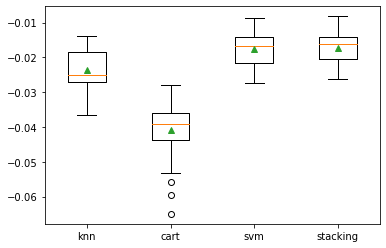

In [51]:


 
# Определим, какие модели будут на нижнем уровне, и результаты которых 
# будут входными данными для моделей верхнего уровня

def get_stacking():
	# определим модели нижнего уровня
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	
  # определим модель верхнего уровня
	level1 = LinearRegression()
	
  # определим модель, в котором будут оба уровня
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# Определим модели, которые будем использовать
def get_models():
  models = dict()
  models['knn'] = KNeighborsRegressor()
  models['cart'] = DecisionTreeRegressor()
  models['svm'] = SVR()
  models['stacking'] = get_stacking()
  return models
 
# обучим каждую модель с кросс-валидацией
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
  return scores

# Начнем запускать функции
# сначала нам нужно получить список моделей
models = get_models()

# затем нам надо обучить каждую модель. 
# мы бы хотели понимать ошибки каждой из них
results = []
names = []
for name, model in models.items():
  scores = evaluate_model(model, X_Train_scaler, target_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# нарисуем графики ошибок
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Ну... наша ансамбль, в целом, работает чуть лучше чем отдельная SVM-модель. Чтож, попробуем предсказать итоговым ансамблем.

In [52]:

# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))

level1 = LinearRegression()

model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

model.fit(X_Train_scaler, target_train)


pred = model.predict(X_Test_scaler)
res = test.Id.to_frame()
res['SalePrice'] = pd.Series(np.exp(pred))
# res.set_index('Id').to_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/submit_stacking.csv')
res.set_index('Id').to_csv('submit_stacking.csv')

***На этом этапе мы получили Score: 0.13390 и были 1340 из 4538 участников***


А что если уберем решающее дерево и заменим его на случайный лес?

>knn -0.024 (0.006)
>forest -0.020 (0.005)
>svr -0.018 (0.005)
>stacking -0.017 (0.005)


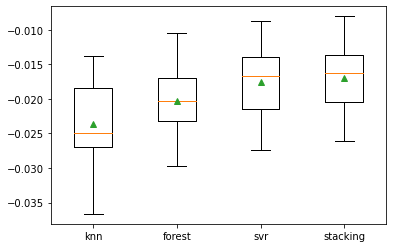

In [53]:
# Определим, какие модели будут на нижнем уровне, и результаты которых 
# будут входными данными для моделей верхнего уровня

def get_stacking():
	# определим модели нижнего уровня
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('forest', RandomForestRegressor()))
	level0.append(('svr', SVR()))
	
  # определим модель верхнего уровня
	level1 = LinearRegression()
	
  # определим модель, в котором будут оба уровня
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# Определим модели, которые будем использовать
def get_models():
  models = dict()
  models['knn'] = KNeighborsRegressor()
  models['forest'] = RandomForestRegressor()
  models['svr'] = SVR()
  models['stacking'] = get_stacking()
  return models
 
# обучим каждую модель с кросс-валидацией
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
  return scores

# Начнем запускать функции
# сначала нам нужно получить список моделей
models = get_models()

# затем нам надо обучить каждую модель. 
# мы бы хотели понимать ошибки каждой из них
results = []
names = []
for name, model in models.items():
  scores = evaluate_model(model, X_Train_scaler, target_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# нарисуем графики ошибок
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Проверим, получим ли мы лучший скор

In [54]:
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('forest', RandomForestRegressor()))
level0.append(('svr', SVR()))

level1 = LinearRegression()

model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

model.fit(X_Train_scaler, target_train)


pred = model.predict(X_Test_scaler)
res = test.Id.to_frame()
res['SalePrice'] = pd.Series(np.exp(pred))
# res.set_index('Id').to_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/submit_one_more_stacking.csv')

res.set_index('Id').to_csv('submit_one_more_stacking.csv')


***На этом этапе мы получили Score: 0.13276 и были 1244 из 4538 участников***

А что, если мы заменим KNN на бустинг? 
Попробуем


In [55]:
# pip install lightgbm

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=19, min_child_samples=20 will be ignored. Current value: min_data_in_

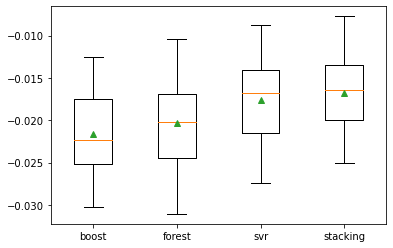

In [56]:
def boost(X,y):
  # определим словарь тех параметров, которые будем перебирать
  

  grid = {
    'max_depth':range(1,16,1),
    'learning_rate':np.arange(0.1, 1, 0.1),
    'iterations':range(1,20,1)
  } 

  # объявим модель, для которой будем перебирать
  model=LGBMRegressor()

  # объявим модель Гридсерч, в которой будем перебирать параметры модели и делать кросс-валидацию 
  # в качестве метрики будем использовать log(rmse)

  gs = RandomizedSearchCV(
                  estimator=model, 
                    param_distributions=param_grid, 
                    cv=5, 
                    scoring = 'neg_mean_squared_log_error'
                  )

  # обучим гридсерч
  gs.fit(X, y)

  # выведем параметры лучшей модели случайного леса
  gs_best_estimator = gs.best_estimator_

  return gs_best_estimator

def get_stacking(X,y):
	# определим модели нижнего уровня
	level0 = list()
 
	level0.append(('boost', boost(X,y)))
	level0.append(('forest', RandomForestRegressor()))
	level0.append(('svr', SVR()))
	
  # определим модель верхнего уровня
	level1 = LinearRegression()
	
  # определим модель, в котором будут оба уровня
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# Определим модели, которые будем использовать
def get_models(X,y):
  models = dict()
  models['boost'] = boost(X,y)
  models['forest'] = RandomForestRegressor()
  models['svr'] = SVR()
  models['stacking'] = get_stacking(X,y)
  return models

# Начнем запускать функции
# сначала нам нужно получить список моделей
models = get_models(X_Train_scaler, target_train)

# затем нам надо обучить каждую модель. 
# мы бы хотели понимать ошибки каждой из них
results = []
names = []
for name, model in models.items():
  scores = evaluate_model(model, X_Train_scaler, target_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# нарисуем графики ошибок
plt.boxplot(results, labels=names, showmeans=True)
plt.show()



In [57]:
# define the base models
level0 = list()
level0.append(('boost', boost(X_Train_scaler, target_train)))
level0.append(('forest', RandomForestRegressor()))
level0.append(('svr', SVR()))

level1 = LinearRegression()

model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

model.fit(X_Train_scaler, target_train)


pred = model.predict(X_Test_scaler)
res = test.Id.to_frame()
res['SalePrice'] = pd.Series(np.exp(pred))
# res.set_index('Id').to_csv('/content/gdrive/MyDrive/Kaggle/house-prices-advanced-regression-techniques/submit_stacking_with_boost_and_random_search.csv')
res.set_index('Id').to_csv('submit_stacking_with_boost_and_random_search.csv')

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6


***На этом этапе мы получили Score: 0.13234 и были 1175 из 4538 участников***

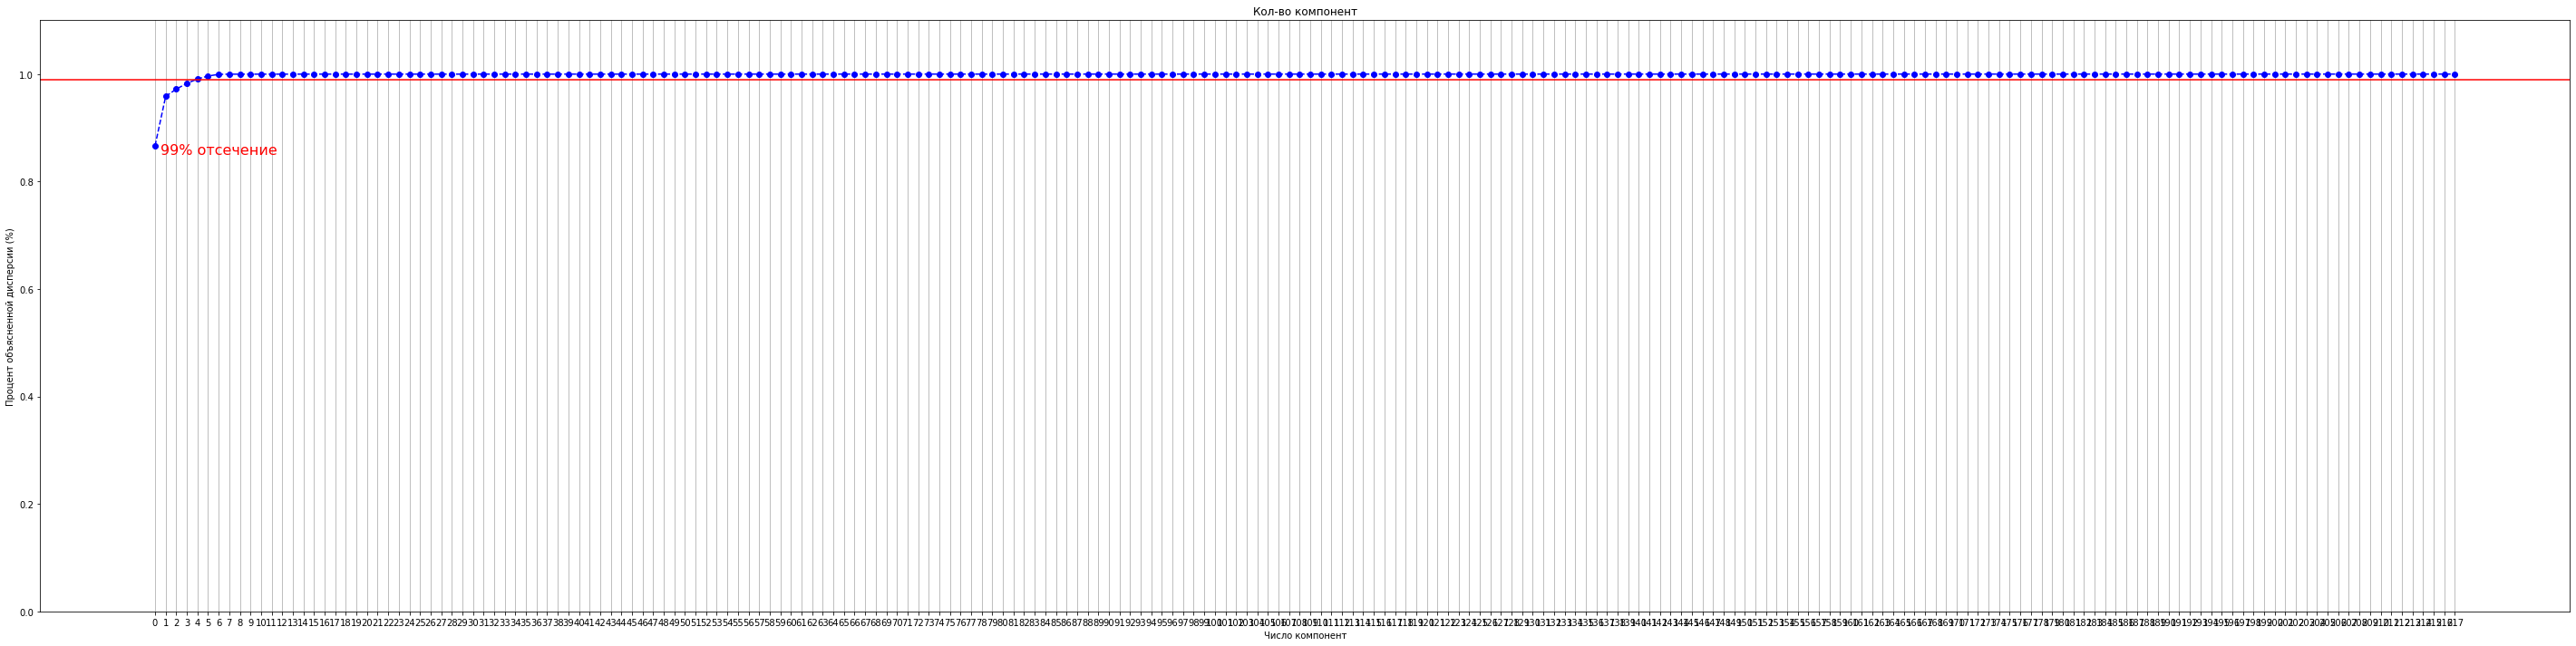

In [58]:





# теперь определим необходимое количество главных компонент

transformer_robust = RobustScaler().fit(features_train)

X_Train_scaler_pca = transformer_robust.transform(features_train)

X_Test_scaler_pca = transformer_robust.transform(features_test.drop(columns='Id',axis=1))

pca = PCA().fit(X_Train_scaler_pca)

plt.rcParams["figure.figsize"] = (50,12)

fig, ax = plt.subplots()
xi = np.arange(0, X_Train_scaler_pca.shape[1], step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Число компонент')
plt.xticks(np.arange(0,X_Train_scaler_pca.shape[1], step=1)) 
plt.ylabel('Процент объясненной дисперсии (%)')
plt.title('Кол-во компонент')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% отсечение', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()



[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=19, min_child_samples=20 will be ignored. Current value: min_data_in_

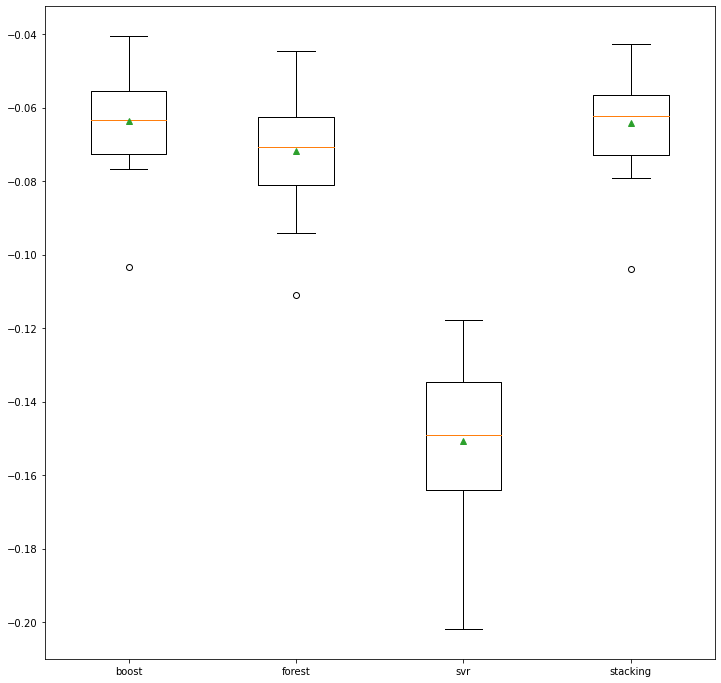

In [59]:
pca = PCA(n_components=5)

pca.fit(X_Train_scaler_pca)



x_train = pca.transform(X_Train_scaler_pca)
x_test = pca.transform(X_Test_scaler_pca)



# Начнем запускать функции
# сначала нам нужно получить список моделей
models = get_models(x_train, target_train)

# затем нам надо обучить каждую модель. 
# мы бы хотели понимать ошибки каждой из них
results = []
names = []
for name, model in models.items():
  scores = evaluate_model(model, x_train, target_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# нарисуем графики ошибок
plt.rcParams["figure.figsize"] = (12,12)
plt.boxplot(results, labels=names, showmeans=True)
plt.show()


Мда... явно не лучшее решение. Но как опыт - неплохо. И даже удалив опорные вектора мы не получим решения лучше.